# Analysis of Lego Dataset

#### Importing the neccesary libraries and  data

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/lego_sets.csv')
parent_theme = pd.read_csv('https://raw.githubusercontent.com/KeithGalli/lego-analysis/master/datasets/parent_themes.csv')

df.head()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [2]:
parent_theme.head()

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False


#### What percentage of all licensed sets ever released were Star Wars themed?

In [9]:
merged_df = df.merge(parent_theme, left_on='parent_theme', right_on='name')
merged_df.drop(columns='name_y', inplace=True)
merged_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [15]:
licensed_df = merged_df[merged_df['is_licensed']]
licensed_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [21]:
merged_df[merged_df['set_num'].isna()]

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
5827,NaN,NaN,2017,304.0,NaN,Super Heroes,482,True
5828,NaN,NaN,2017,196.0,NaN,Super Heroes,482,True
5829,NaN,NaN,2014,NaN,NaN,Super Heroes,482,True
5830,NaN,NaN,2013,16.0,NaN,Super Heroes,482,True
5831,NaN,NaN,2013,NaN,NaN,Super Heroes,482,True
...,...,...,...,...,...,...,...,...
10274,NaN,NaN,2015,518.0,NaN,Minecraft,577,True
10275,NaN,NaN,2016,NaN,NaN,Minecraft,577,True
10276,NaN,NaN,2017,502.0,NaN,Minecraft,577,True
10277,NaN,NaN,2014,NaN,NaN,Minecraft,577,True


In [23]:
merged_df[merged_df['set_num'].isna()].shape

(153, 8)

In [26]:
licensed_df = licensed_df.dropna(subset=['set_num'])
licensed_df[licensed_df['set_num'].isna()].shape

(0, 8)

In [33]:
star_wars = licensed_df[licensed_df['parent_theme'] == 'Star Wars']
star_wars_themed_sets = int((star_wars.shape[0] / licensed_df.shape[0]) * 100)
print(f"{star_wars_themed_sets}% of all licensed sets ever released were Star Wars themed")

51% of all licensed sets ever released were Star Wars themed


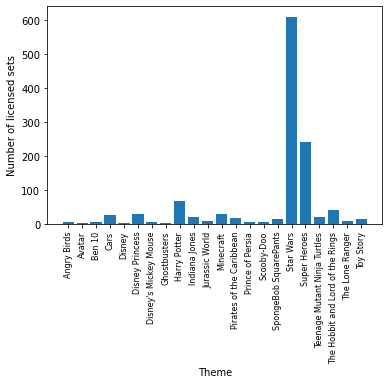

In [69]:
licensed_results = licensed_df.groupby('parent_theme').sum()
themes = [theme for theme, df in licensed_df.groupby('parent_theme')]

plt.bar(themes, licensed_results['is_licensed'])
plt.xticks(themes, rotation='vertical', size=8)
plt.xlabel('Theme')
plt.ylabel('Number of licensed sets')
plt.show()

#A graphical representation

#### In which year was Star Wars not the most popular licensed theme? (in terms of number of sets released that year)

In [105]:
licensed_sorted = licensed_df.sort_values('year')
licensed_sorted.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3702,7161-1,Gungan Sub,1999,379.0,Star Wars Episode 1,Star Wars,158,True
3705,7171-1,Mos Espa Podrace,1999,NaN,Star Wars Episode 1,Star Wars,158,True
3690,7140-1,X-wing Fighter,1999,271.0,Star Wars Episode 4/5/6,Star Wars,158,True
3685,7130-1,Snowspeeder,1999,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3684,7128-1,Speeder Bikes,1999,93.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [108]:
summed_licensed = licensed_sorted.groupby(['year', 'parent_theme']).sum().reset_index()
max_df = summed_licensed.sort_values('is_licensed', ascending=False).drop_duplicates('year')
max_df.sort_values('year', inplace=True)
max_df 

# In 2017, Star Wars was not the most popular licensed theme, instead it was Super Heroes. 

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23
